## Análisis estadístico de la temporada 2023-2024 de la NBA 

La temporada 2023-2024 de la NBA (National Basketball Association) empezó el 24 de octubre de 2023 y terminará en junio de 2024. Al ingresar al enlace https://www.kaggle.com/datasets/bryanchungweather/nba-teams-standing-dataset-for-the-2023-2024/data se podrán conseguir los datos asociados a esta temporada en el archivo “NBA_2024_Eastern_Conference_Standing.csv”

Dicho archivo contiene las posiciones proyectadas de los equipos de la Conferencia Este (compuesta por 15 equipos, repartidos en 3 divisiones), durante la temporada 2023-2024. Estas proyecciones se calculan según los resultados de la temporada anterior, y se actualizan según vaya avanzando la temporada actual. A la fecha, cada equipo ha jugado entre 70 y 71 partidos de un total de 80 para la temporada regular.

Algunas de las columnas que encontrará en el documento son:

• Eastern Conference: Nombres de los equipos.

• W: Número proyectado de victorias (respecto a un total de 80 partidos).

• L: Número proyectado de derrotas (respecto a un total de 80 partidos).

• W/L%: porcentaje proyectado de victorias (respecto a un total de 80 partidos).

• SOS: Dificultad del oponente.

• rSOS: Dificultad relativa del oponente.

• SRS: Sistema de calificación simple.

• Current: número de victorias y derrotas a la fecha (en la temporada actual) .

• Remain: número proyectado de victorias en lo que falta de la temporada.

• Best: el mejor de los escenarios proyectados (victorias - derrotas).

• Worst: el peor de los escenarios proyectados (victorias - derrotas).

• Playoffs: Probabilidad de llegar a los playoffs.

• Division: Probabilidad de ser primero en su división.

• Win Conf: Probabilidad de ganar el campeonato de la Conferencia Este.

• Win Finals: Probabilidad de ganar las Finales de la NBA.


A continuación se realizan algunas estadísticas para esta temporada

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se abre el archivo mencionado creando un DataFrame llamado “basket_df”. Se puede visualizar completo agregando el comando: pd.set_option('display.max_columns', None)

In [ ]:
basket_df=pd.read_csv("NBA_2024_Eastern_Conference_Standing.csv")
pd.set_option('display.max_columns', None)
basket_df

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,1,2,3,4,5,6,7,8,Unnamed: 21,1-6,7.1,8.1,9,10,Out,Unnamed: 28,Win Conf,Win Finals
0,Boston Celtics,58.5,21.5,0.731,3.28,-0.46,16.72,7-2,52-19,73-7,45-35,100.0%,82.9%,82.7,15.9,1.2,0.2,0.1,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,58.4%,44.5%
1,Philadelphia 76ers,53.1,26.9,0.664,-0.06,0.13,11.19,7-1,46-26,68-12,37-43,99.9%,16.7%,16.6,65.7,11.5,3.6,1.5,0.7,0.3,0.2,NaN,99.5,0.3,0.2,0.1,NaN,NaN,NaN,23.7%,14.2%
2,New York Knicks,44.7,35.3,0.559,0.84,0.39,5.22,4-4,41-31,60-20,30-50,87.4%,0.3%,0.3,4.7,20.7,18.9,14.7,11.8,9.4,6.9,NaN,71.1,9.3,7.5,5.0,3.5,3.6,NaN,5.0%,2.1%
3,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,5-4,39-32,58-22,28-52,82.1%,52.0%,0.2,4.5,17.9,15.7,13.9,11.6,9.6,8.8,NaN,63.8,10.0,8.6,7.0,4.7,6.0,NaN,3.2%,1.1%
4,Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,6-3,37-34,58-22,29-51,79.4%,61.9%,0.1,3.6,15.7,15.4,14.5,12.2,9.7,8.4,NaN,61.3,9.9,9.1,7.0,5.7,7.1,NaN,2.7%,0.9%
5,Orlando Magic,42.4,37.6,0.530,-1.83,0.42,2.17,5-4,37-34,57-23,26-54,72.4%,33.1%,0.1,2.4,10.4,12.0,12.7,12.6,12.1,10.3,NaN,50.1,12.3,10.6,9.4,7.2,10.4,NaN,2.0%,0.7%
6,Toronto Raptors,41.5,38.5,0.518,3.66,0.26,2.10,4-5,37-34,56-24,25-55,64.0%,NaN,NaN,1.0,6.5,9.0,10.8,11.8,12.2,12.7,NaN,39.1,12.8,11.7,11.6,9.5,15.2,NaN,1.6%,0.6%
7,Brooklyn Nets,41.4,38.6,0.517,3.01,0.37,2.01,4-5,37-34,58-22,26-54,63.6%,0.1%,NaN,0.8,6.0,8.8,10.5,12.3,13.0,12.1,NaN,38.5,11.9,13.1,11.5,10.0,14.9,NaN,1.7%,0.6%
8,Cleveland Cavaliers,40.1,39.9,0.501,2.62,0.07,0.40,4-5,36-35,56-24,25-55,50.6%,20.7%,NaN,0.6,4.0,6.1,7.7,9.6,11.0,11.6,NaN,28.0,11.2,11.4,12.7,12.1,24.6,NaN,0.8%,0.2%
9,Miami Heat,39.5,40.5,0.494,0.68,0.30,-0.77,5-4,34-37,54-26,24-56,43.9%,14.0%,NaN,0.5,3.4,5.1,6.5,7.6,9.8,11.0,NaN,23.1,9.5,10.9,12.3,14.2,29.9,NaN,0.5%,0.1%


Se elimina desde las columnas 13 hasta la 28 del DataFrame, la cual es información que no se requiere para el análisis. 

In [ ]:
elim = basket_df.drop(basket_df.columns[13:29], axis=1)
elim

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
0,Boston Celtics,58.5,21.5,0.731,3.28,-0.46,16.72,7-2,52-19,73-7,45-35,100.0%,82.9%,58.4%,44.5%
1,Philadelphia 76ers,53.1,26.9,0.664,-0.06,0.13,11.19,7-1,46-26,68-12,37-43,99.9%,16.7%,23.7%,14.2%
2,New York Knicks,44.7,35.3,0.559,0.84,0.39,5.22,4-4,41-31,60-20,30-50,87.4%,0.3%,5.0%,2.1%
3,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,5-4,39-32,58-22,28-52,82.1%,52.0%,3.2%,1.1%
4,Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,6-3,37-34,58-22,29-51,79.4%,61.9%,2.7%,0.9%
5,Orlando Magic,42.4,37.6,0.530,-1.83,0.42,2.17,5-4,37-34,57-23,26-54,72.4%,33.1%,2.0%,0.7%
6,Toronto Raptors,41.5,38.5,0.518,3.66,0.26,2.10,4-5,37-34,56-24,25-55,64.0%,NaN,1.6%,0.6%
7,Brooklyn Nets,41.4,38.6,0.517,3.01,0.37,2.01,4-5,37-34,58-22,26-54,63.6%,0.1%,1.7%,0.6%
8,Cleveland Cavaliers,40.1,39.9,0.501,2.62,0.07,0.40,4-5,36-35,56-24,25-55,50.6%,20.7%,0.8%,0.2%
9,Miami Heat,39.5,40.5,0.494,0.68,0.30,-0.77,5-4,34-37,54-26,24-56,43.9%,14.0%,0.5%,0.1%


In [ ]:
# Exportar el DataFrame como archivo .txt
elim.to_csv('elim.txt', sep='\t', index=False)

Se realiza un análisis para saber cuáles son los equipos que tienen mayor y menor probabilidad de pasar a los playoffs. 

In [ ]:
tipos_de_datos = elim.dtypes
print(tipos_de_datos)

Eastern Conference     object
W                     float64
L                     float64
W/L%                  float64
SOS                   float64
rSOS                  float64
SRS                   float64
Current                object
Remain                 object
Best                   object
Worst                  object
Playoffs               object
Division               object
Win Conf               object
Win Finals             object
dtype: object


In [ ]:
# Seleccionar la columna de "Playoffs" y encontrar el valor máximo y mínimo como objeto numérico con values[0]
#elim.loc[:, ["Playoffs"]].apply(np.max)
mayor_prob = elim.iloc[:, 11:12].max().values[0]
menor_prob = elim.iloc[:, 11:12].min().values[0]
#mayor_prob
#menor_prob

# Encontrar la fila que tiene el valor máximo y mínimo en la columna "Playoffs"
fila_mayor_prob = elim[elim['Playoffs'] == mayor_prob]
fila_menor_prob = elim[elim['Playoffs'] == menor_prob]
#fila_mayor_prob
#fila_menor_prob

# Obtener el dato correspondiente de la columna "Eastern Conference"
equipo_mayor_prob = fila_mayor_prob['Eastern Conference'].values[0]
equipo_menor_prob = fila_menor_prob['Eastern Conference'].values[0]

print("El equipo con mayor probabilidad es:", equipo_mayor_prob, "\nEl equipo con menor probabilidad es:", equipo_menor_prob)


El equipo con mayor probabilidad es: Philadelphia 76ers 
El equipo con menor probabilidad es: Detroit Pistons


Se clasifican los equipos en cada una de las divisiones de la Conferencia Este (División Atlántico, División Central, División Sureste) y se crean tres DataFrame.

In [ ]:
#División Atlántico:

#Boston Celtics
#Brooklyn Nets
#New York Knicks
#Philadelphia 76ers
#Toronto Raptors

#División Central:

#Chicago Bulls
#Cleveland Cavaliers
#Detroit Pistons
#Indiana Pacers
#Milwaukee Bucks

# División Sureste

#Atlanta Hawks
#Charlotte Hornets
#Miami Heat
#Orlando Magic
#Washington Wizards

In [ ]:
# Lista de equipos de la División Atlántico
equipos_atlantico = ["Boston Celtics", "Philadelphia 76ers", "New York Knicks", "Toronto Raptors", "Brooklyn Nets"]

# Seleccionar filas de los equipos pertenecientes a la División Atlántico
df_atlantico = elim[elim['Eastern Conference'].isin(equipos_atlantico)]
df_atlantico

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
0,Boston Celtics,58.5,21.5,0.731,3.28,-0.46,16.72,7-2,52-19,73-7,45-35,100.0%,82.9%,58.4%,44.5%
1,Philadelphia 76ers,53.1,26.9,0.664,-0.06,0.13,11.19,7-1,46-26,68-12,37-43,99.9%,16.7%,23.7%,14.2%
2,New York Knicks,44.7,35.3,0.559,0.84,0.39,5.22,4-4,41-31,60-20,30-50,87.4%,0.3%,5.0%,2.1%
6,Toronto Raptors,41.5,38.5,0.518,3.66,0.26,2.10,4-5,37-34,56-24,25-55,64.0%,NaN,1.6%,0.6%
7,Brooklyn Nets,41.4,38.6,0.517,3.01,0.37,2.01,4-5,37-34,58-22,26-54,63.6%,0.1%,1.7%,0.6%


In [ ]:
# Lista de equipos de la División Central
equipos_central = ["Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Indiana Pacers", "Milwaukee Bucks"]

# Seleccionar filas de los equipos pertenecientes a la División Atlántico
df_central = elim[elim['Eastern Conference'].isin(equipos_central)]
df_central

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
4,Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,6-3,37-34,58-22,29-51,79.4%,61.9%,2.7%,0.9%
8,Cleveland Cavaliers,40.1,39.9,0.501,2.62,0.07,0.40,4-5,36-35,56-24,25-55,50.6%,20.7%,0.8%,0.2%
10,Milwaukee Bucks,39.2,40.8,0.491,2.55,0.28,-1.11,5-4,34-37,54-26,25-55,42.0%,15.8%,0.5%,0.1%
11,Chicago Bulls,33.3,46.7,0.416,0.43,0.60,-4.57,3-6,30-41,48-32,19-61,5.2%,1.3%,NaN,NaN
14,Detroit Pistons,31.1,48.9,0.389,-1.15,0.82,-4.95,2-8,29-41,47-33,16-64,1.9%,0.3%,NaN,NaN


In [ ]:
# Lista de equipos de la División Sureste
equipos_Sureste = ["Atlanta Hawks", "Charlotte Hornets", "Miami Heat", "Orlando Magic", "Washington Wizards"]

# Seleccionar filas de los equipos pertenecientes a la División Atlántico
df_Sureste = elim[elim['Eastern Conference'].isin(equipos_Sureste)]
df_Sureste

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
3,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,5-4,39-32,58-22,28-52,82.1%,52.0%,3.2%,1.1%
5,Orlando Magic,42.4,37.6,0.530,-1.83,0.42,2.17,5-4,37-34,57-23,26-54,72.4%,33.1%,2.0%,0.7%
9,Miami Heat,39.5,40.5,0.494,0.68,0.30,-0.77,5-4,34-37,54-26,24-56,43.9%,14.0%,0.5%,0.1%
12,Charlotte Hornets,33.1,46.9,0.413,-0.30,0.87,-5.43,3-5,30-42,49-31,17-63,5.0%,0.7%,NaN,NaN
13,Washington Wizards,31.9,48.1,0.399,1.58,0.64,-5.92,2-6,30-42,50-30,17-63,2.6%,0.3%,NaN,NaN


A continuación se define una función de probabilidad discreta por medio de una función llamada f_prob_central(name), donde el parámetro de entrada es el nombre (un string) de algún equipo perteneciente a la División Central, y se retorna el valor de la probabilidad de que dicho equipo termine de primero en dicha división. Adicionalmente, se hace un diagrama de barras donde se grafique dicha función.

In [ ]:
def f_prob_central(name:str):
    # Encontrar la fila que contiene el nombre ingresado
    fila_nombre_equipo = df_central[df_central["Eastern Conference"] == name]
    prob = fila_nombre_equipo["Division"].str.rstrip('%')
    prob = prob.astype(float).values[0]

    return prob

In [ ]:
print("La probabilidad de que el equipo ingresado esté de primero en esta división es", f_prob_central("Chicago Bulls") )

La probabilidad de que el equipo ingresado esté de primero en esta división es 1.3


In [ ]:
df_central[["Eastern Conference","Division"]]
#df_central

#Ubicar "Eastern Conference" como índice
df_central.set_index("Eastern Conference", inplace=True)
df_central

,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
Eastern Conference,,,,,,,,,,,,,,
Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,6-3,37-34,58-22,29-51,79.4%,61.9%,2.7%,0.9%
Cleveland Cavaliers,40.1,39.9,0.501,2.62,0.07,0.40,4-5,36-35,56-24,25-55,50.6%,20.7%,0.8%,0.2%
Milwaukee Bucks,39.2,40.8,0.491,2.55,0.28,-1.11,5-4,34-37,54-26,25-55,42.0%,15.8%,0.5%,0.1%
Chicago Bulls,33.3,46.7,0.416,0.43,0.60,-4.57,3-6,30-41,48-32,19-61,5.2%,1.3%,NaN,NaN
Detroit Pistons,31.1,48.9,0.389,-1.15,0.82,-4.95,2-8,29-41,47-33,16-64,1.9%,0.3%,NaN,NaN


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Indiana Pacers'),
  Text(1, 0, 'Cleveland Cavaliers'),
  Text(2, 0, 'Milwaukee Bucks'),
  Text(3, 0, 'Chicago Bulls'),
  Text(4, 0, 'Detroit Pistons')])

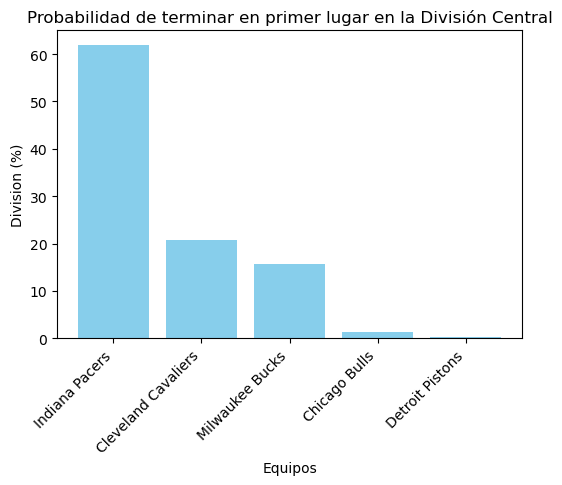

In [ ]:
plt.figure(figsize=(6, 4))

equipos = df_central.index
division = df_central['Division'].str.rstrip('%').astype(float)
plt.bar(equipos, division, color='skyblue')
plt.xlabel('Equipos')
plt.ylabel('Division (%)')
plt.title('Probabilidad de terminar en primer lugar en la División Central')
plt.xticks(rotation=45, ha='right')
#plt.show()


Por otro lado, teniendo en cuenta el DataFrame df_sureste, se hace un gráfico donde se compara la probabilidad proyectada de victorias, con respecto al porcentaje real de las mismas a la fecha actual para cada uno de sus 5 equipos.

In [ ]:
#df_Sureste = elim[elim['Eastern Conference'].isin(equipos_Sureste)]
df_Sureste

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,Win Conf,Win Finals
3,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,5-4,39-32,58-22,28-52,82.1%,52.0%,3.2%,1.1%
5,Orlando Magic,42.4,37.6,0.530,-1.83,0.42,2.17,5-4,37-34,57-23,26-54,72.4%,33.1%,2.0%,0.7%
9,Miami Heat,39.5,40.5,0.494,0.68,0.30,-0.77,5-4,34-37,54-26,24-56,43.9%,14.0%,0.5%,0.1%
12,Charlotte Hornets,33.1,46.9,0.413,-0.30,0.87,-5.43,3-5,30-42,49-31,17-63,5.0%,0.7%,NaN,NaN
13,Washington Wizards,31.9,48.1,0.399,1.58,0.64,-5.92,2-6,30-42,50-30,17-63,2.6%,0.3%,NaN,NaN


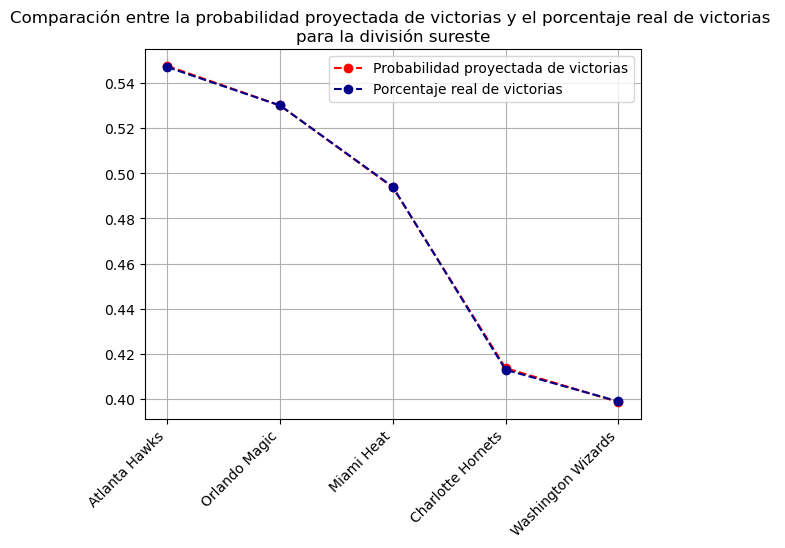

In [ ]:
# Para obtener la probabilidad proyectada de victorias se debe dividir el número proyectado de victorias con respecto al total de partidos
datos = df_Sureste[["Eastern Conference", "W", "W/L%"]]
#Ubicar "Eastern Conference" como índice
datos.set_index('Eastern Conference', inplace=True)

prob_proy_vict = datos["W"]/80
porcen_proy_vict = datos["W/L%"]
equipos = datos.index

plt.plot(equipos, prob_proy_vict, 'o--',color = 'red', label = "Probabilidad proyectada de victorias")
plt.plot(equipos, porcen_proy_vict, 'o--',color = 'darkblue' ,label = "Porcentaje real de victorias" )
plt.title('Comparación entre la probabilidad proyectada de victorias y el porcentaje real de victorias \npara la división sureste')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend()


A continuación se comparan, para TODOS los 15 equipos, el porcentaje real de victorias a la fecha, con la cantidad (porcentual) de victorias en el mejor y en el peor de los escenarios proyectados.

In [ ]:
new_elim = elim[["Eastern Conference", "W/L%", "Best", "Worst"]]

# Dividir los valores de las columnas "Best" y "Worst" por el guion "-" y seleccionar el primer valor asociado a las victorias
new_elim['Best'] = new_elim['Best'].str.split('-').str[0].astype(float)
new_elim['Worst'] = new_elim['Worst'].str.split('-').str[0].astype(float)

cant_porc_vict_mejor = new_elim['Best']/80
cant_porc_vict_peor  = new_elim['Worst']/80
equipos = new_elim["Eastern Conference"]
porcen_proy_vict = new_elim["W/L%"]




C:\Users\valen\AppData\Local\Temp\ipykernel_36848\2433734676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_elim['Best'] = new_elim['Best'].str.split('-').str[0].astype(float)
C:\Users\valen\AppData\Local\Temp\ipykernel_36848\2433734676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_elim['Worst'] = new_elim['Worst'].str.split('-').str[0].astype(float)


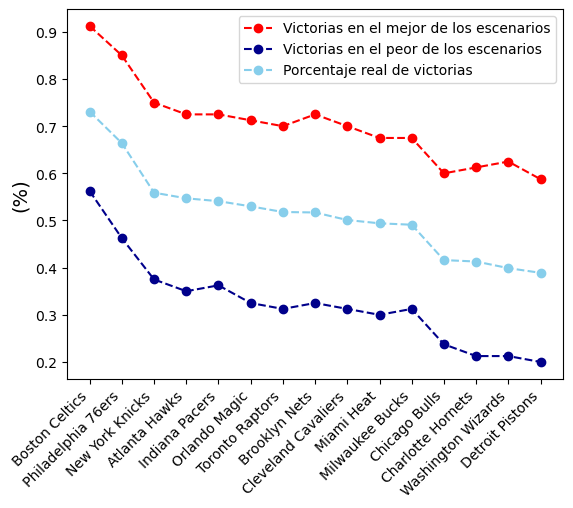

In [ ]:
plt.plot(equipos, cant_porc_vict_mejor,'o--',color = 'red', label = "Victorias en el mejor de los escenarios")
plt.plot(equipos, cant_porc_vict_peor,'o--',color = 'darkblue', label = "Victorias en el peor de los escenarios")
plt.plot(equipos, porcen_proy_vict,'o--',color = 'skyblue', label = "Porcentaje real de victorias")
plt.xticks(rotation=45, ha='right')
plt.ylabel('(%)', size = '14')
plt.legend()

Posteriormente se calcularon algunos estadísticos en las columnas del dataframe basket_df y se respondieron preguntas como: ¿Cuál es la media, la varianza y la desviación estándar de la cantidad proyectada de victorias (columna Win) en el conjunto de datos?

In [ ]:
basket_df["W"].describe()

count    15.000000
mean     41.126667
std       7.513936
min      31.100000
25%      36.250000
50%      41.400000
75%      43.550000
max      58.500000
Name: W, dtype: float64

In [ ]:
varianza =  basket_df["W"].var()
varianza

56.45923809523809

In [ ]:
print("La media de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es de 41.12")
print("La desviación estándar de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es 7.51")
print("La varianza de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es", round(varianza,2))

La media de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es de 41.12
La desviación estándar de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es 7.51
La varianza de la cantidad proyectada de victorias para la temporada 2023-2024 de la NBA es 56.46


Finalmente, se hace un gráfico de barras donde se grafique la probabilidad de cada uno de los 15 equipos de ganar la final de la NBA.

In [ ]:
# Llenar los NaN con ceros en las dos últimas columnas
# Nota: no se usó el "inplace= True" por facilidad en el manejo de los demás datos.
# Además se usó "0.0%" en lugar de ceros para poder convertir toda la columna a un valor flotante

#new2_basket_df = basket_df.copy()
#new2_basket_df['Win Conf'].fillna("0.0%", inplace= True)
#new2_basket_df['Win Finals'].fillna("0.0%", inplace= True)
#new2_basket_df

In [ ]:
# Llenar los NaN con ceros % en las dos últimas columnas y convertirlos en flotante
new_basket_df1 = basket_df.copy()
prob_ganar_campeonato = new_basket_df1['Win Conf'].fillna("0.0%").str.rstrip('%').astype(float)
prob_ganar_final = new_basket_df1['Win Finals'].fillna("0.0%").str.rstrip('%').astype(float)/100

#print(prob_ganar_campeonato)
#print(prob_ganar_final)

In [ ]:
# crear una nueva columna con las iniciales de los nombres de los equipos
new_basket_df1.loc[:, "Iniciales"] = ["BC", "P76", "NYK", "AH", "IP", "OM", "TR", "BN", "CC", "MH", "MB", "CB", "CH", "WW", "DP" ]
new_basket_df1.set_index("Iniciales", inplace=True)
# Convertir a valor flotante la columna de 'Win Finals'
new_basket_df1

,Eastern Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,Worst,Playoffs,Division,1,2,3,4,5,6,7,8,Unnamed: 21,1-6,7.1,8.1,9,10,Out,Unnamed: 28,Win Conf,Win Finals
Iniciales,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BC,Boston Celtics,58.5,21.5,0.731,3.28,-0.46,16.72,7-2,52-19,73-7,45-35,100.0%,82.9%,82.7,15.9,1.2,0.2,0.1,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,58.4%,44.5%
P76,Philadelphia 76ers,53.1,26.9,0.664,-0.06,0.13,11.19,7-1,46-26,68-12,37-43,99.9%,16.7%,16.6,65.7,11.5,3.6,1.5,0.7,0.3,0.2,NaN,99.5,0.3,0.2,0.1,NaN,NaN,NaN,23.7%,14.2%
NYK,New York Knicks,44.7,35.3,0.559,0.84,0.39,5.22,4-4,41-31,60-20,30-50,87.4%,0.3%,0.3,4.7,20.7,18.9,14.7,11.8,9.4,6.9,NaN,71.1,9.3,7.5,5.0,3.5,3.6,NaN,5.0%,2.1%
AH,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,5-4,39-32,58-22,28-52,82.1%,52.0%,0.2,4.5,17.9,15.7,13.9,11.6,9.6,8.8,NaN,63.8,10.0,8.6,7.0,4.7,6.0,NaN,3.2%,1.1%
IP,Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,6-3,37-34,58-22,29-51,79.4%,61.9%,0.1,3.6,15.7,15.4,14.5,12.2,9.7,8.4,NaN,61.3,9.9,9.1,7.0,5.7,7.1,NaN,2.7%,0.9%
OM,Orlando Magic,42.4,37.6,0.530,-1.83,0.42,2.17,5-4,37-34,57-23,26-54,72.4%,33.1%,0.1,2.4,10.4,12.0,12.7,12.6,12.1,10.3,NaN,50.1,12.3,10.6,9.4,7.2,10.4,NaN,2.0%,0.7%
TR,Toronto Raptors,41.5,38.5,0.518,3.66,0.26,2.10,4-5,37-34,56-24,25-55,64.0%,NaN,NaN,1.0,6.5,9.0,10.8,11.8,12.2,12.7,NaN,39.1,12.8,11.7,11.6,9.5,15.2,NaN,1.6%,0.6%
BN,Brooklyn Nets,41.4,38.6,0.517,3.01,0.37,2.01,4-5,37-34,58-22,26-54,63.6%,0.1%,NaN,0.8,6.0,8.8,10.5,12.3,13.0,12.1,NaN,38.5,11.9,13.1,11.5,10.0,14.9,NaN,1.7%,0.6%
CC,Cleveland Cavaliers,40.1,39.9,0.501,2.62,0.07,0.40,4-5,36-35,56-24,25-55,50.6%,20.7%,NaN,0.6,4.0,6.1,7.7,9.6,11.0,11.6,NaN,28.0,11.2,11.4,12.7,12.1,24.6,NaN,0.8%,0.2%


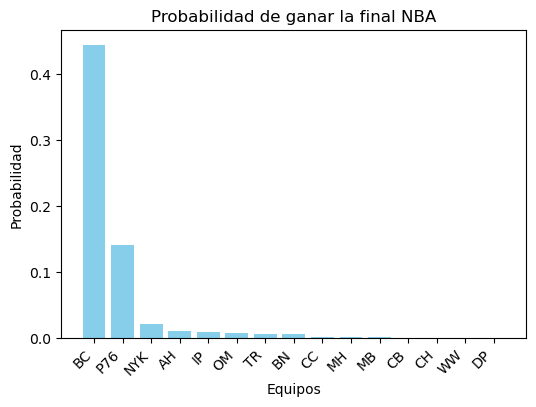

In [ ]:
plt.figure(figsize=(6, 4))

equipos = new_basket_df1.index
plt.bar(equipos, prob_ganar_final, color='skyblue')
plt.xlabel('Equipos')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de ganar la final NBA')
plt.xticks(rotation=45, ha='right')
plt.show()